In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir = 'data'
os.listdir(data_dir)

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle = True,
    image_size = (180,180),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123
)

Found 1835 files belonging to 30 classes.
Using 1468 files for training.


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.2, 
    subset="validation", 
    seed=123 
)

Found 1835 files belonging to 30 classes.
Using 367 files for validation.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(180,180),
    shuffle=False,
    batch_size=32,
)

Found 1835 files belonging to 30 classes.


In [8]:
type(data_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [9]:
category = data_train.class_names

tf.Tensor(
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 2

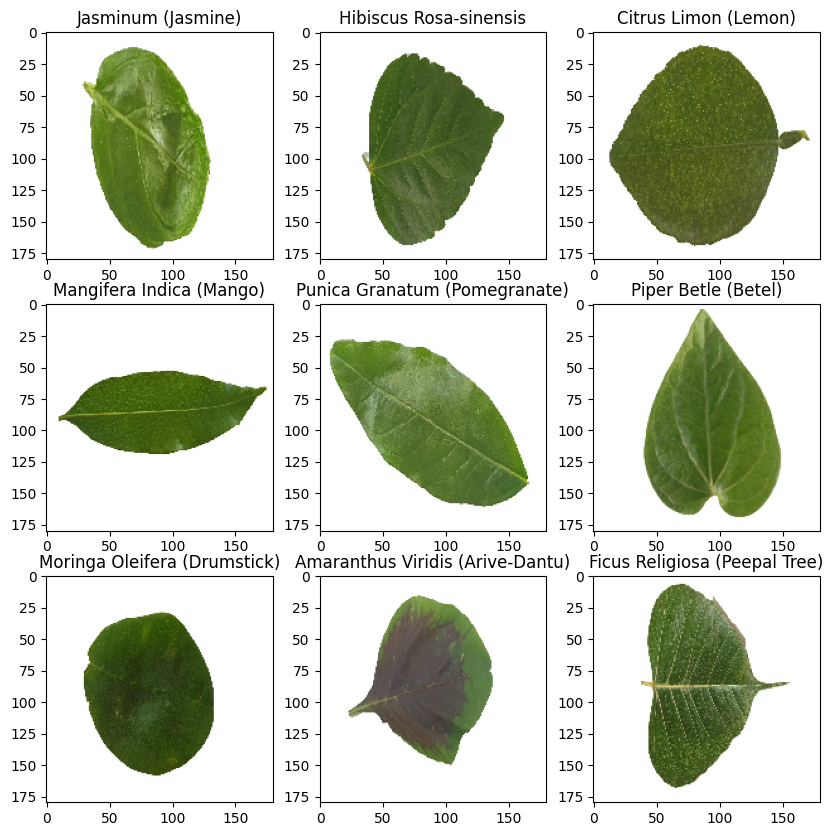

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range (9):
        print(image)
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(category[labels[i]])

In [11]:
model = Sequential([
    Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
            input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Flatten(),
    Dense(units=512, activation="relu"),
    Dropout(0.3),
    Dense(units=len(category), activation="softmax")
])


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 75)   │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 75)   │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 90, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 25)     │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 25)     │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13225)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,771,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,834,877 (26.07 MB)

 Trainable params: 6,834,577 (26.07 MB)

 Non-trainable params: 300 (1.17 KB)

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [51]:
history = model.fit(data_train, validation_data=data_val, epochs=10)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9332 - loss: 0.2216 - val_accuracy: 0.7847 - val_loss: 0.7289
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 992ms/step - accuracy: 0.9444 - loss: 0.1745 - val_accuracy: 0.7493 - val_loss: 1.0493
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9299 - loss: 0.2575 - val_accuracy: 0.5722 - val_loss: 2.3133
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9478 - loss: 0.2047 - val_accuracy: 0.6403 - val_loss: 1.8952
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9304 - loss: 0.2170 - val_accuracy: 0.7684 - val_loss: 1.2631
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9382 - loss: 0.2489 - val_accuracy: 0.7384 - val_loss: 1.3132
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9613 - loss: 0.1242 - val_accuracy: 0.8338 - val_loss: 0.9542
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9617 - loss: 0.1441 - val_accuracy: 0.5504 - val_lo

In [52]:
test_loss, test_acc = model.evaluate(data_test)
print(f"\nTest Accuracy: {test_acc}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.6988 - loss: 1.5150

Test Accuracy: 0.6953678727149963


Text(0.5, 1.0, 'Loss')

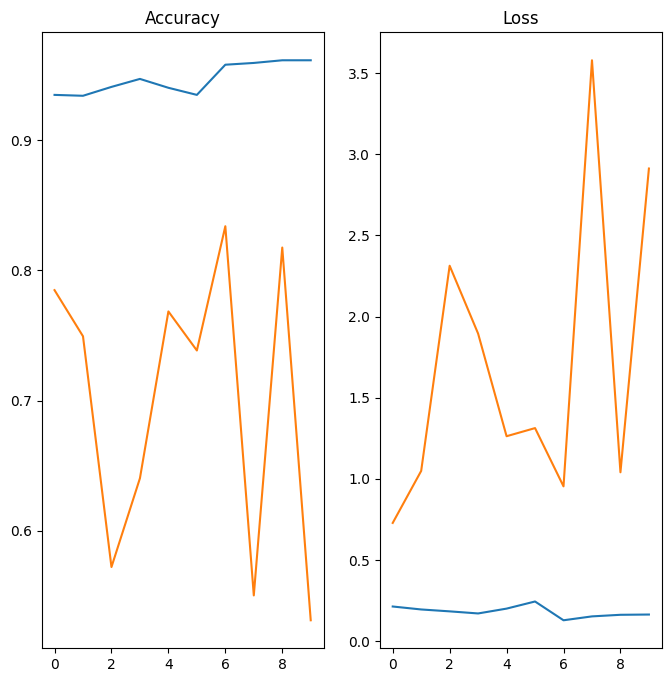

In [54]:
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [55]:
img_width = 180
img_height =180 

In [67]:
image = 'leaf4.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [68]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [69]:
score = tf.nn.softmax(predict)

In [70]:
data_cat = data_train.class_names
print('image is a {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

image is a Punica Granatum (Pomegranate) with accuracy of 8.56
